In [ ]:
!python -W ignore HousePricesRedux.py

In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cbook
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn import model_selection
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import xgboost as xgb
import lightgbm as lgb

import seaborn as sns

import mlxtend
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read datasets and Check them

In [3]:
#Load datasets
pd.set_option('display.max_columns', 500)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#Check sizes
print ('\nTrain shape: ',train.shape)
print ('\nTest shape: ',test.shape)


Train shape:  (1460, 81)

Test shape:  (1459, 80)


In [5]:
#Save ID
train_id = train['Id']
test_id = test['Id']

#Drop Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# EDA

In [6]:
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Lets build correlation matrix for variables including SalePrice

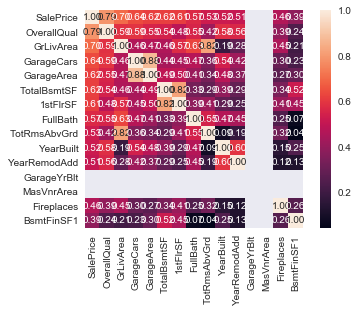

In [7]:
sns.set()
corrmat = train.corr()

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Lets now explore relationship between SalePrices and top correlated variables

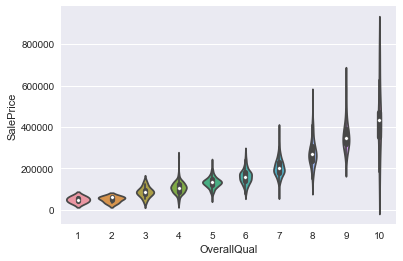

In [9]:
sns.violinplot(x="OverallQual", y="SalePrice", data=train, split=True);

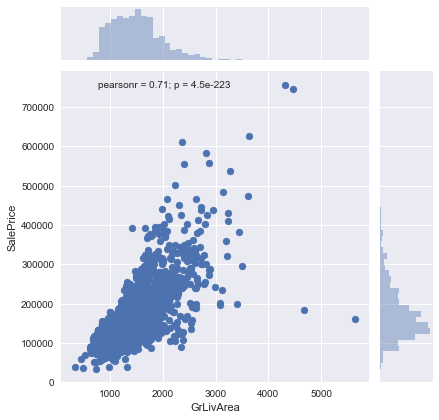

In [10]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train);

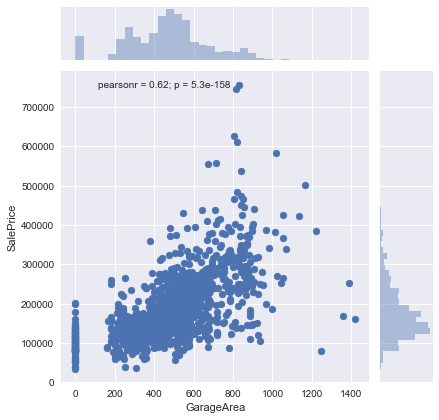

In [11]:
sns.jointplot(x="GarageArea", y="SalePrice", data=train);

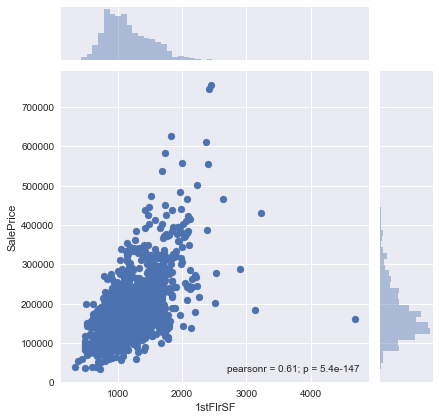

In [12]:
sns.jointplot(x="1stFlrSF", y="SalePrice", data=train);

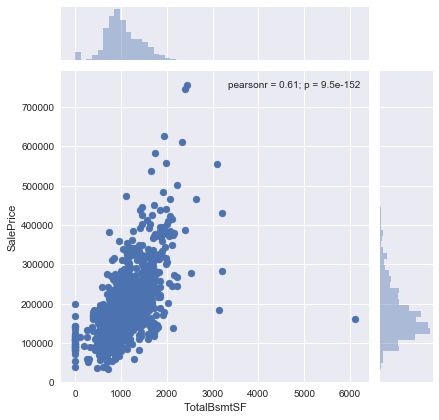

In [13]:
sns.jointplot(x="TotalBsmtSF", y="SalePrice", data=train);

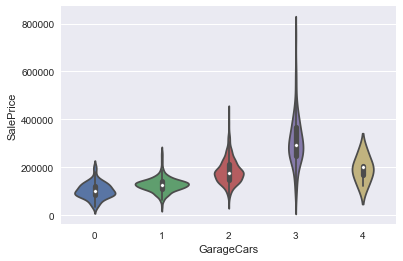

In [14]:
sns.violinplot(x="GarageCars", y="SalePrice", data=train, split=True);

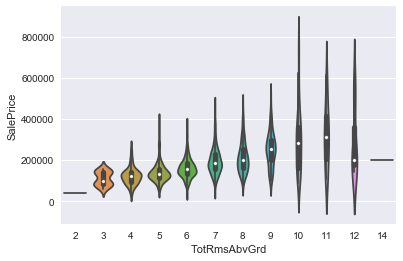

In [15]:
sns.violinplot(x="TotRmsAbvGrd", y="SalePrice", data=train, split=True);

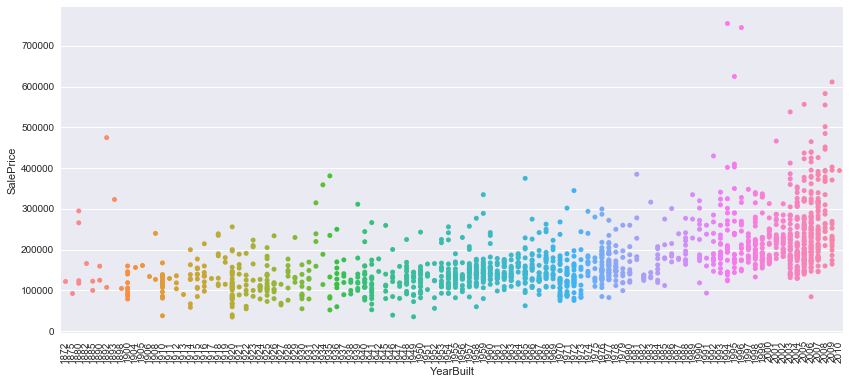

In [16]:
plt.subplots(figsize=(14, 6))
p = sns.stripplot(x="YearBuilt", y="SalePrice", data=train);
p.set_xticklabels(p.get_xticklabels(),rotation=90);

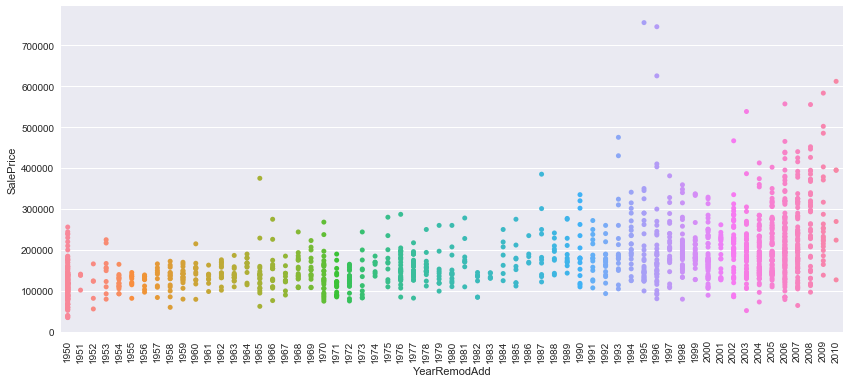

In [17]:
plt.subplots(figsize=(14, 6))
p = sns.stripplot(x="YearRemodAdd", y="SalePrice", data=train);
p.set_xticklabels(p.get_xticklabels(),rotation=90);

In [18]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#train = train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index)

# Compare Train and Test Sets

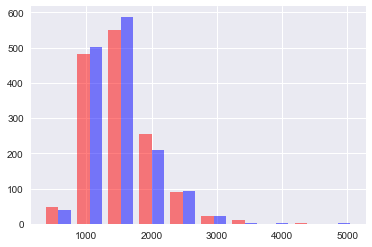

In [19]:
plt.hist([train.GrLivArea, test.GrLivArea], color=['r','b'], alpha=0.5);

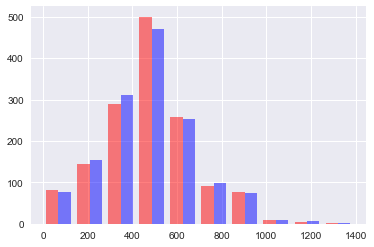

In [20]:
plt.hist([train.GarageArea, test.GarageArea], color=['r','b'], alpha=0.5);

# Data Imputation

In [21]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


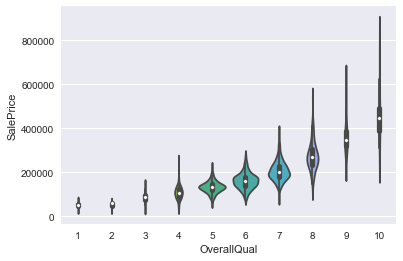

In [23]:
sns.violinplot(x="OverallQual", y="SalePrice", data=train, split=True, scale='count');

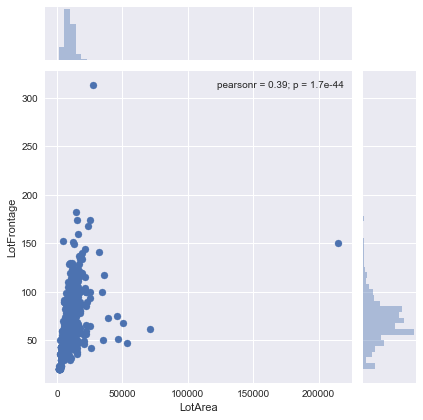

In [24]:
sns.jointplot(x="LotArea", y="LotFrontage", data=train);

In [25]:
#LotFrontageRatio = all_data.loc[all_data.LotFrontage != 'Nan'].LotArea/ 

In [26]:
#Replacing N/A Values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data = all_data.drop(['Functional'], axis=1)
all_data = all_data.drop(['Electrical'], axis=1)
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data["MSSubClass"] = all_data.groupby("Neighborhood")["MSSubClass"].transform(
    lambda x: x.fillna(x.mode()))

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [28]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [29]:
# Imputing LotFrontage through Lot Area
train_lot = train.loc[~pd.isnull(train['LotFrontage'])]
test_lot = train.loc[pd.isnull(train['LotFrontage'])]
print(train_lot.shape)
print(test_lot.shape)

(1199, 80)
(259, 80)


In [30]:
#Deleting outliers
train_lot = train_lot.drop(train_lot[(train_lot['LotArea']>50000)].index)

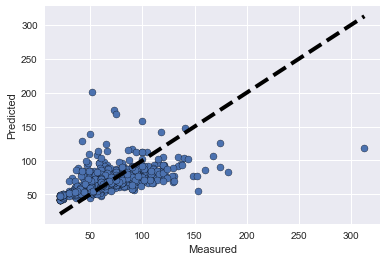

In [31]:
from sklearn.model_selection import cross_val_predict
lr = linear_model.LinearRegression()
y = train_lot.LotFrontage

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_lot.LotArea.values.reshape(-1,1), y, cv=2)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Feature Engineering

In [32]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [33]:
all_data.OverallQual.describe()

count     2917
unique      10
top          5
freq       825
Name: OverallQual, dtype: object

In [34]:
#Encoding categorical variables to preserver order
all_data.Street = all_data.Street.astype('category', ordered=True, categories=['Grvl', 'Pave']).cat.codes
all_data.BsmtCond = all_data.BsmtCond.astype('category', ordered=True, categories=['Po', 'Fa','None','TA','Gd','Ex']).cat.codes
all_data.ExterCond = all_data.ExterCond.astype('category', ordered=True, categories=['Po', 'Fa','Gd','TA','Ex']).cat.codes
all_data.ExterQual = all_data.ExterQual.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.FireplaceQu = all_data.FireplaceQu.astype('category', ordered=True, categories=['Po','None','Fa', 'TA','Gd','Ex']).cat.codes
all_data.BsmtQual = all_data.BsmtQual.astype('category', ordered=True, categories=['Po','Fa','None', 'TA','Gd','Ex']).cat.codes
all_data.GarageQual = all_data.GarageQual.astype('category', ordered=True, categories=['None','Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.GarageCond = all_data.GarageCond.astype('category', ordered=True, categories=['None','Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.HeatingQC = all_data.HeatingQC.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data = all_data.drop(columns=['PoolQC'])
all_data.KitchenQual = all_data.KitchenQual.astype('category', ordered=True, categories=['Po','Fa', 'TA','Gd','Ex']).cat.codes
all_data.GarageFinish = all_data.GarageFinish.astype('category', ordered=True, categories=['None','Unf', 'RFn','Fin']).cat.codes
all_data.PavedDrive = all_data.PavedDrive.astype('category', ordered=True, categories=['N','P', 'Y']).cat.codes
all_data.OverallCond = all_data.OverallCond.astype('category', ordered=True, categories=['1','2', '3','4','5','6','7','8','9','10']).cat.codes
all_data.CentralAir = all_data.CentralAir.astype('category', ordered=True, categories=['N','Y']).cat.codes
all_data.OverallQual = all_data.OverallQual.astype('category', ordered=True, categories=['1','2', '3','4','5','6','7','8','9','10']).cat.codes


In [35]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtFinType1', 
        'BsmtFinType2', 'Fence', 'BsmtExposure', 'LandSlope',
        'LotShape',  'Alley',  'MSSubClass',  
        'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 75)


In [36]:
#Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']

In [37]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = train.SalePrice.values
y_train = np.log1p(y_train)


In [38]:
numeric_feats = all_data.dtypes[(all_data.dtypes != "object")].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [39]:
skewness = skewness[abs(skewness.Skew) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [40]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 213)


# Feature Selection

In [41]:
ntrain = train.shape[0]
ntest = test.shape[0]

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

Feature ranking:
1. feature 45 (0.190846) | (0.190846)
2. feature 56 (0.169788) | (0.360634)
3. feature 18 (0.120018) | (0.480652)
4. feature 33 (0.068140) | (0.548792)
5. feature 29 (0.054787) | (0.603578)
6. feature 24 (0.050516) | (0.654094)
7. feature 15 (0.030236) | (0.684330)
8. feature 13 (0.025327) | (0.709657)
9. feature 26 (0.020793) | (0.730449)
10. feature 22 (0.018779) | (0.749228)
11. feature 20 (0.017147) | (0.766375)
12. feature 53 (0.012547) | (0.778922)
13. feature 23 (0.012241) | (0.791164)
14. feature 21 (0.010160) | (0.801324)
15. feature 0 (0.009360) | (0.810683)
16. feature 112 (0.009193) | (0.819876)
17. feature 51 (0.007547) | (0.827424)
18. feature 7 (0.006540) | (0.833964)
19. feature 44 (0.006282) | (0.840245)
20. feature 146 (0.006263) | (0.846509)
21. feature 150 (0.006048) | (0.852557)
22. feature 54 (0.005821) | (0.858377)
23. feature 117 (0.005805) | (0.864182)
24. feature 4 (0.004781) | (0.868964)
25. feature 35 (0.004714) | (0.873678)
26. feature 121 

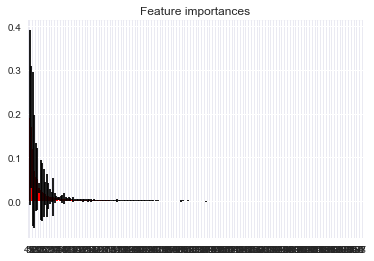

In [42]:
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

forest.fit(train_df, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_df.shape[1]):
    print("%d. feature %d (%f) | (%f)" % (f + 1, indices[f], importances[indices[f]],np.cumsum(importances[indices])[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_df.shape[1]), indices)
plt.xlim([-1, train_df.shape[1]])
plt.show()

In [43]:
train_df.columns[indices]

Index(['OverallQual', 'TotalSF', 'ExterQual', 'KitchenQual', 'GrLivArea',
       'GarageCars', 'CentralAir', 'BsmtQual', 'GarageFinish', 'FullBath',
       ...
       'RoofMatl_Metal', 'Exterior2nd_AsphShn', 'Condition2_PosA',
       'Condition2_RRAe', 'Condition2_PosN', 'RoofStyle_Shed',
       'MiscFeature_TenC', 'RoofMatl_Roll', 'Exterior1st_ImStucc',
       'Condition2_RRAn'],
      dtype='object', length=213)

In [44]:
train_df.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,1,3,1.540963,1.540963,11.170327,0.0,2,2.259674,1.0,0.000000,4,7.483296,0.730463,0.000000,1.540963,1.540963,1.820334,1,0,2,548.0,2.0,1.540963,2,1.540963,14.187527,13.698888,1,4,0.730463,3,0.0,19.212182,5.831328,3,0.0,10,8.059126,0.0,4,5.714669,4,6,1.194318,0.0,0.0,0.730463,8,856.0,0.000000,2003,2003,2008,14.976591,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,

In [117]:
new_train = train_df[train_df.columns[indices[0:200]]]
new_test = test_df[test_df.columns[indices[0:200]]]

# PCA

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
pca.fit(new_train)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
print(pca.explained_variance_ratio_) 

[  8.45416028e-01   1.49048587e-01   3.66995636e-03   1.05065300e-03
   1.72028310e-04   1.28118374e-04   6.55453312e-05   6.02785668e-05
   4.83411569e-05   4.07069330e-05   3.97770161e-05   3.56980166e-05
   3.09532778e-05   2.53426298e-05   2.18903432e-05   1.98201525e-05
   1.77636767e-05   1.37207002e-05   8.17092824e-06   7.96341520e-06
   7.49569536e-06   6.72109349e-06   6.53463385e-06   5.29246870e-06
   4.59988745e-06]


In [120]:
X = pca.transform(new_train)

# Models Creation

In [121]:
from sklearn.model_selection import GridSearchCV
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(new_train.values)
    rmse= np.sqrt(-cross_val_score(model, new_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Extra Trees Forest

In [122]:
xforest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

In [123]:
score = rmsle_cv(xforest)
print("\nExtraTreesRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ExtraTreesRegressor score: 0.1297 (0.0086)



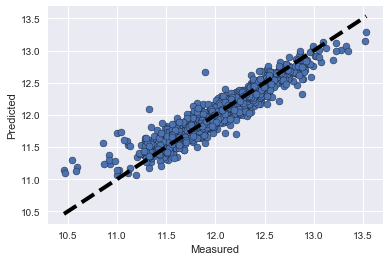

In [125]:

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(xforest, new_train, y, cv=3)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Lasso

In [53]:
parameters = {'alpha':[0.0001,0.001, 0.0015,0.02,0.005]}
lasso_p = Lasso()
clf = GridSearchCV(lasso_p, parameters)
clf.fit(new_train.values, y_train)
clf.best_params_

{'alpha': 0.0015}

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.002, random_state=42))
#lasso = Lasso(alpha =0.18, random_state=42)

In [55]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.6174 (0.2194)



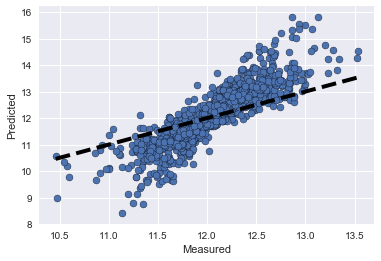

In [56]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(lasso, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### ENet

In [57]:
parameters = {'alpha':[0.0001,0.001, 0.0015,0.002,0.0025]}
enet_p = ElasticNet()
clf = GridSearchCV(enet_p, parameters)
clf.fit(new_train.values, y_train)
clf.best_params_

{'alpha': 0.002}

In [58]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.002, l1_ratio=.9, random_state=3))

In [59]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.7145 (0.2963)



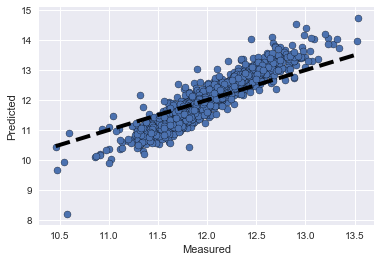

In [60]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(ENet, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### KRR

In [61]:
parameters = {'kernel':('linear', 'polynomial'), 'alpha':[0.01,0.015, 0.3,0.6,0.001],'degree':[2,3,4],'coef0':[1,2,2.5]}
KRR_p = KernelRidge()
clf = GridSearchCV(KRR_p, parameters)
clf.fit(new_train.values, y_train)
clf.best_params_

{'alpha': 0.001, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'}

In [84]:
KRR = KernelRidge(alpha=0.001, kernel='linear', degree=3, coef0=2.0)

In [85]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 12.7698 (2.8143)



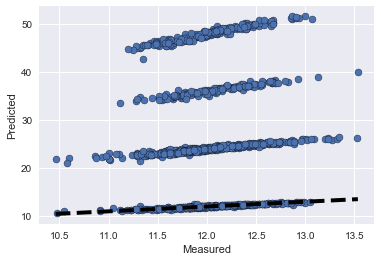

In [86]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(KRR, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### GBoost

In [87]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [88]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1172 (0.0069)



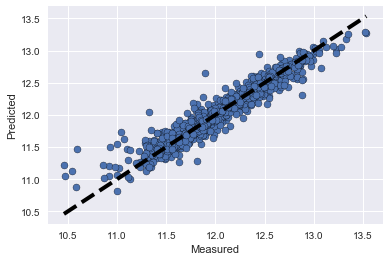

In [89]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(GBoost, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### XGBoost

In [90]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=11, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                                nthread = -1)

In [97]:
model_xgb = xgb.XGBRegressor(colsample_bytree=1., gamma=0.0468, 
                             learning_rate=0.05, max_depth=10, 
                             min_child_weight=6, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.8, silent=1,
                                nthread = -1)

In [98]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1173 (0.0066)



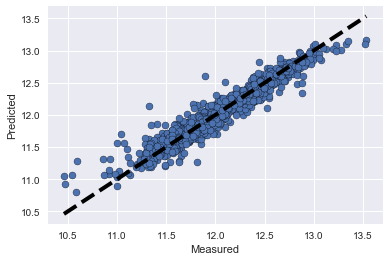

In [99]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(model_xgb, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### LGB

In [93]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [94]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1174 (0.0057)



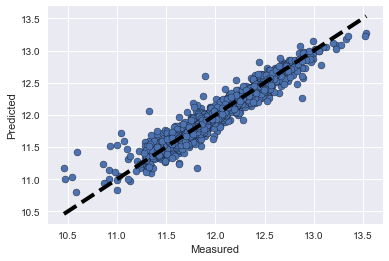

In [95]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
predicted = cross_val_predict(model_lgb, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Stacking

In [101]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [102]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1152 (0.0059)


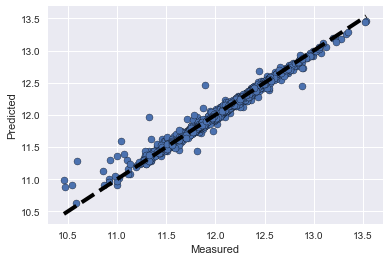

In [103]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(stacked_averaged_models, new_train, y, cv=5)
stacked_averaged_models.fit(new_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(new_train.values)

fig, ax = plt.subplots()
ax.scatter(y, stacked_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [104]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='adam', hidden_layer_sizes=100,
                           max_iter=200, shuffle=True, random_state=1,
                           activation='identity')
mlp.fit(new_train.values, y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [105]:
score = rmsle_cv(mlp)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 163.6108 (244.7120)


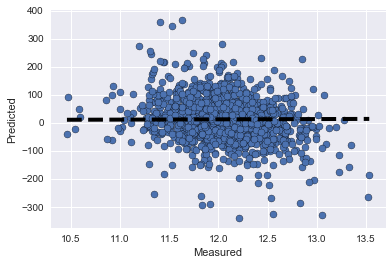

In [106]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(stacked_averaged_models, new_train, y, cv=5)
mlp_train_pred = mlp.predict(new_train.values)

fig, ax = plt.subplots()
ax.scatter(y, mlp_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Prediction

In [107]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [108]:
forest.fit(new_train, y_train)
forest_train_pred = forest.predict(new_train)
forest_pred = np.expm1(forest.predict(new_test))
print(rmsle(y_train, forest_train_pred))

9.35427220055e-06


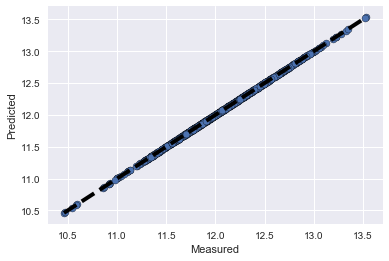

In [109]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
y = y_train
#predicted = cross_val_predict(xforest, new_train, y, cv=5)


fig, ax = plt.subplots()
ax.scatter(y, forest_train_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [110]:
stacked_pred = np.expm1(stacked_averaged_models.predict(new_test.values))
print(rmsle(y_train, stacked_train_pred))

0.0603340742279


In [111]:
model_xgb.fit(new_train, y_train)
xgb_train_pred = model_xgb.predict(new_train)
xgb_pred = np.expm1(model_xgb.predict(new_test))
print(rmsle(y_train, xgb_train_pred))

0.0688057324036


In [112]:
model_lgb.fit(new_train, y_train)
lgb_train_pred = model_lgb.predict(new_train)
lgb_pred = np.expm1(model_lgb.predict(new_test.values))
print(rmsle(y_train, lgb_train_pred))

0.0742770674309


In [114]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.15 +
               lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0616676367245


In [115]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [116]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = stacked_pred
sub.to_csv('submission_stacked.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = forest_pred
sub.to_csv('submission_forest.csv',index=False)

In [ ]:
ensemble2 = stacked_pred*0.70 + forest_pred*0.1 + xgb_pred*0.1 + lgb_pred*0.1
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = ensemble2
sub.to_csv('submission_ensemble2.csv',index=False)